# PCA – Analiza Głównych Składowych

### Przykład

Butelka coca-coli

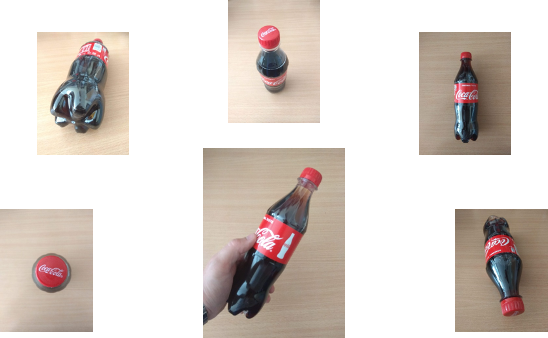

- Nasze obserwacje zależą od punktu widzenia!
- Rzutujemy dane 3d na płaszczyznę 2d! – Redukcja wymiarowości!
- Jaki punkt widzenia jest najlepszy? 
- Który układ odniesienia dostarcza nam najwięcej informacji? 

#### JAK WAŻNY JEST DOBÓR UKŁADU ODNIESIENIA?

### Perspektywa historyczna

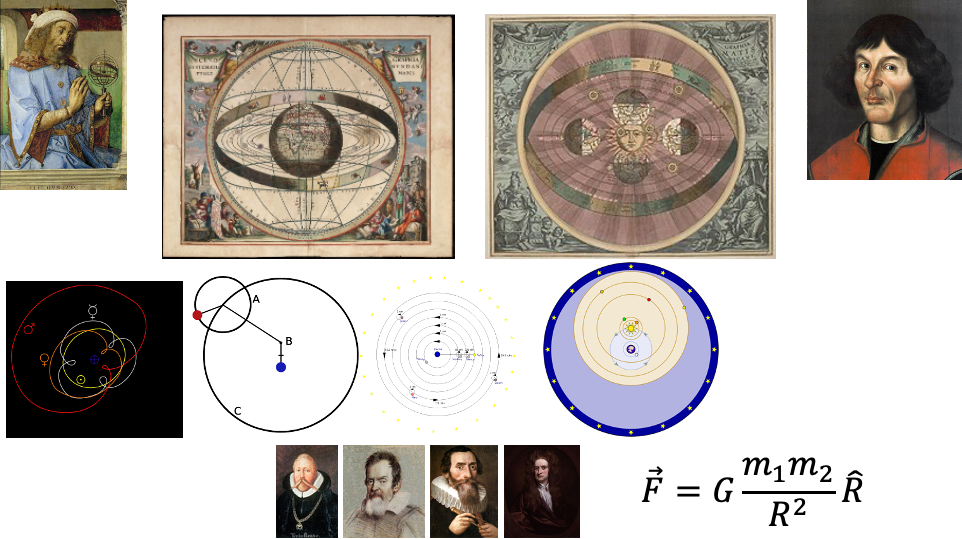
[źródło grafik: Wikipedia]

### Co z danymi?

- Rzutowanie danych redukuje wymiarowość
- Ale jak wybrać NAJLEPSZY rzut?

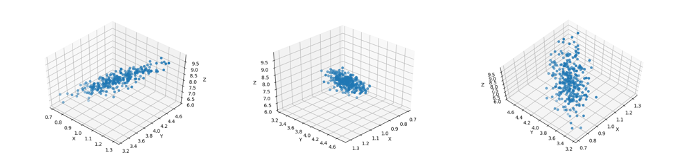

PCA – Analiza Głównych Składowych - algorytm, który pomaga nam zredukować wymiarowość 
zestawu danych oraz dobrać najlepszy rzut dla nich!

### PCA – jak to działa?

Procedura:

1. Znajdź centrum zestawu danych,
2. Znajdź ustandaryzowaną średnią i rozrzut (wariancję) danych,
3. Wyznacz kierunek, który maksymalizuje wariancję danych – to będzie pierwsza główna składowa,
4. Znajdź kierunek ortogonalny do pierwszego,
5. Powtórz punkty 3 i 4 jeżeli Twoje dane mają więcej wymiarów,
6. Liczba znalezionych głównych składowych może być maksymalnie równa pierwotnemu wymiarowi danych
7. Jedyne dopuszczalne operacje w trakcie wyznaczania głównych składowych to translacja i rotacja układu odniesienia. 

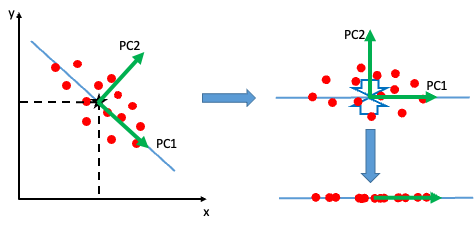

### PCA jako algorytm uczenia maszynowego

"Uczenie maszynowe to dziedzina informatyki, która często wykorzystuje techniki statystyczne, aby dać komputerom zdolność do "uczenia się" (tj. stopniowej poprawy wydajności w określonym zadaniu) z danymi, bez wyraźnego programowania." - jedna z definicji uczenia maszynowego.

Uczenie maszynowe możemy podzielić ze względu na:
1. Zastosowana:
- klasycikacja
- regresja/prognostyka
- opltymalizacja
- klastrowanie
2. Ze względu na sposób uczenia
- uczenie nadzorowane
- uczenie nienadzorowane

Analiza głównych składowych to nienadzorowana technika klastrowania.  

PCA - najważniejsze cechy:
- Jeden z najpowszechniej stosowanych algorytmów uczenia maszynowego bez nadzoru. 
- Usystematyzowany sposób przekształcania cech wejściowych w główne składowe.
- Główne składowe są wykorzystywane jako nowe cechy.
- Główne składowe są kierunkami w danych, które maksymalizują wariancję (minimalicują utratę informacji) kiedy rzutujemy na nie oryginalne dane
- większa wariancja danych wzdłuż PC, wyższa pozycja PC w rankingu, (największa wariancja/najwięcej informacji -> pierwszy PC drugi - największa wariancja..., 
- maks. liczba PC = liczba cech wejściowych.

### Modelowy przykład danych – zestaw danych kosaśca (Iris flower data set) 

- Wielowymiarowy zestaw danych wprowadzony przez brytyjskiego statystyka i biologa Ronalda Fishere w jego publikacji z 1936 roku – „The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis”.
- Ten zestaw danych stał się przykładem testowym dla wielu metod klasyfikacji!

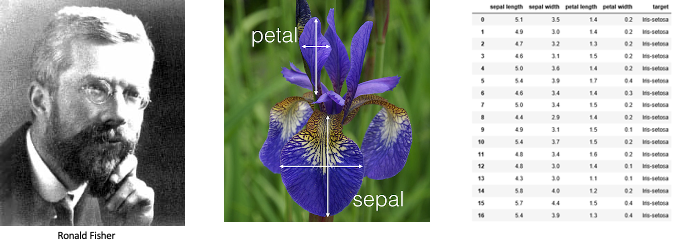

#### DANE W ZESTAWIE SĄ 4-WYMIAROWE!

### Import niezbędnych bibliotek

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Pobieranie danych i tworzenie ramki danych

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Podział na dane i na etykiety

In [3]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

### Standaryzacja danych - średnia ustawiana na 0, wariancja na 1

In [6]:
x = StandardScaler().fit_transform(x)

### Utworzenie obiektu PCA (2 składowe w konstruktorze)

In [11]:
pca = PCA(n_components=2)

### Dopasowanie i utworzenie nowej ramki danych

In [12]:
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

### Wykres danych po redukcji składowych

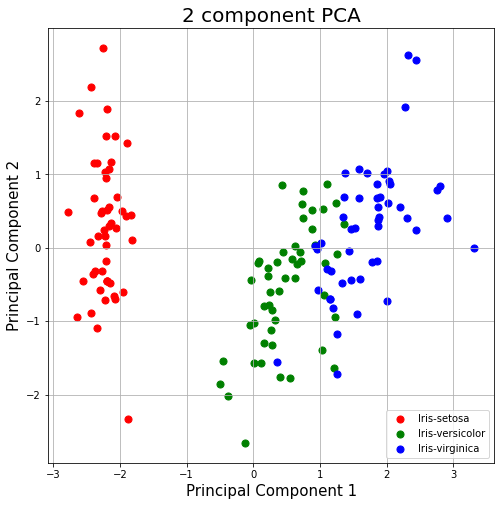

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()